### 모델링 후 전처리

In [9]:
# 1. Load the data
import pandas as pd

data = pd.read_csv('../DATA/scale_2_to_4.csv')
data.head()

,E_scr_pv,E_scr_sv,c_temp_pv,k_rpm_pv,k_rpm_sv,n_temp_pv,n_temp_sv,scale_pv,s_temp_pv,scr_dv,ctemp_dv,rpm_dv,ntemp_dv,stemp_dv,scale_pv_diff,weekday
0,8,8,69.6,189,180,67.2,70,3.01,67.1,0,0.4,-9,2.8,2.9,0.00,3
1,8,8,69.8,189,180,67.2,70,3.01,67.0,0,0.2,-9,2.8,3.0,0.00,3
2,8,8,69.7,189,180,67.9,70,3.08,65.9,0,0.3,-9,2.1,4.1,0.07,3
3,8,8,69.7,189,180,67.8,70,3.08,65.9,0,0.3,-9,2.2,4.1,0.00,3
4,8,8,69.7,189,180,67.8,70,3.08,65.9,0,0.3,-9,2.2,4.1,0.00,3


In [10]:
len(data)

28124

In [11]:
# 1. E_scr : pv만 사용, 이상치 제거
data.drop(data[data['scr_dv'] > 2].index, inplace=True)
len(data)   # 19개 제거
# E_scr_sv, scr_dv 제거
data.drop(['E_scr_sv', 'scr_dv'], axis=1, inplace=True)
data.head()

,E_scr_pv,c_temp_pv,k_rpm_pv,k_rpm_sv,n_temp_pv,n_temp_sv,scale_pv,s_temp_pv,ctemp_dv,rpm_dv,ntemp_dv,stemp_dv,scale_pv_diff,weekday
0,8,69.6,189,180,67.2,70,3.01,67.1,0.4,-9,2.8,2.9,0.00,3
1,8,69.8,189,180,67.2,70,3.01,67.0,0.2,-9,2.8,3.0,0.00,3
2,8,69.7,189,180,67.9,70,3.08,65.9,0.3,-9,2.1,4.1,0.07,3
3,8,69.7,189,180,67.8,70,3.08,65.9,0.3,-9,2.2,4.1,0.00,3
4,8,69.7,189,180,67.8,70,3.08,65.9,0.3,-9,2.2,4.1,0.00,3


In [12]:
# 3. rpm은 1번에서 19개 처리, dv만 사용
data.drop(['k_rpm_pv', 'k_rpm_sv'], axis=1, inplace=True)
data.head()

,E_scr_pv,c_temp_pv,n_temp_pv,n_temp_sv,scale_pv,s_temp_pv,ctemp_dv,rpm_dv,ntemp_dv,stemp_dv,scale_pv_diff,weekday
0,8,69.6,67.2,70,3.01,67.1,0.4,-9,2.8,2.9,0.00,3
1,8,69.8,67.2,70,3.01,67.0,0.2,-9,2.8,3.0,0.00,3
2,8,69.7,67.9,70,3.08,65.9,0.3,-9,2.1,4.1,0.07,3
3,8,69.7,67.8,70,3.08,65.9,0.3,-9,2.2,4.1,0.00,3
4,8,69.7,67.8,70,3.08,65.9,0.3,-9,2.2,4.1,0.00,3


In [13]:
# 3. n_temp : sv 일부에서만 이상치 확인

data[data['n_temp_sv'] == 0]

,E_scr_pv,c_temp_pv,n_temp_pv,n_temp_sv,scale_pv,s_temp_pv,ctemp_dv,rpm_dv,ntemp_dv,stemp_dv,scale_pv_diff,weekday
6361,12,71.1,59.2,0,3.59,69.9,-1.1,5,-59.2,0.1,0.6,4
6362,12,71.1,59.1,0,3.59,69.9,-1.1,5,-59.1,0.1,0.0,4
6363,12,71.1,59.2,0,3.59,69.9,-1.1,7,-59.2,0.1,0.0,4
6364,12,71.0,59.1,0,3.59,69.9,-1.0,10,-59.1,0.1,0.0,4
6365,12,71.1,59.1,0,3.59,69.8,-1.1,12,-59.1,0.2,0.0,4


In [14]:
# n_temp_sv 가 0이어도 기타 값의 이상치는 없으므로 컬럼만 삭제
data.drop('n_temp_sv', axis=1, inplace=True)
data.drop('ntemp_dv', axis=1, inplace=True)
data.head()

,E_scr_pv,c_temp_pv,n_temp_pv,scale_pv,s_temp_pv,ctemp_dv,rpm_dv,stemp_dv,scale_pv_diff,weekday
0,8,69.6,67.2,3.01,67.1,0.4,-9,2.9,0.00,3
1,8,69.8,67.2,3.01,67.0,0.2,-9,3.0,0.00,3
2,8,69.7,67.9,3.08,65.9,0.3,-9,4.1,0.07,3
3,8,69.7,67.8,3.08,65.9,0.3,-9,4.1,0.00,3
4,8,69.7,67.8,3.08,65.9,0.3,-9,4.1,0.00,3


In [15]:
# 4. scale_pv_diff 제거
data.drop('scale_pv_diff', axis=1, inplace=True)

In [16]:
# +) ctemp_dv, stemp_dv 제거
data.drop('ctemp_dv', axis=1, inplace=True)
data.drop('stemp_dv', axis=1, inplace=True)
data.head()

,E_scr_pv,c_temp_pv,n_temp_pv,scale_pv,s_temp_pv,rpm_dv,weekday
0,8,69.6,67.2,3.01,67.1,-9,3
1,8,69.8,67.2,3.01,67.0,-9,3
2,8,69.7,67.9,3.08,65.9,-9,3
3,8,69.7,67.8,3.08,65.9,-9,3
4,8,69.7,67.8,3.08,65.9,-9,3


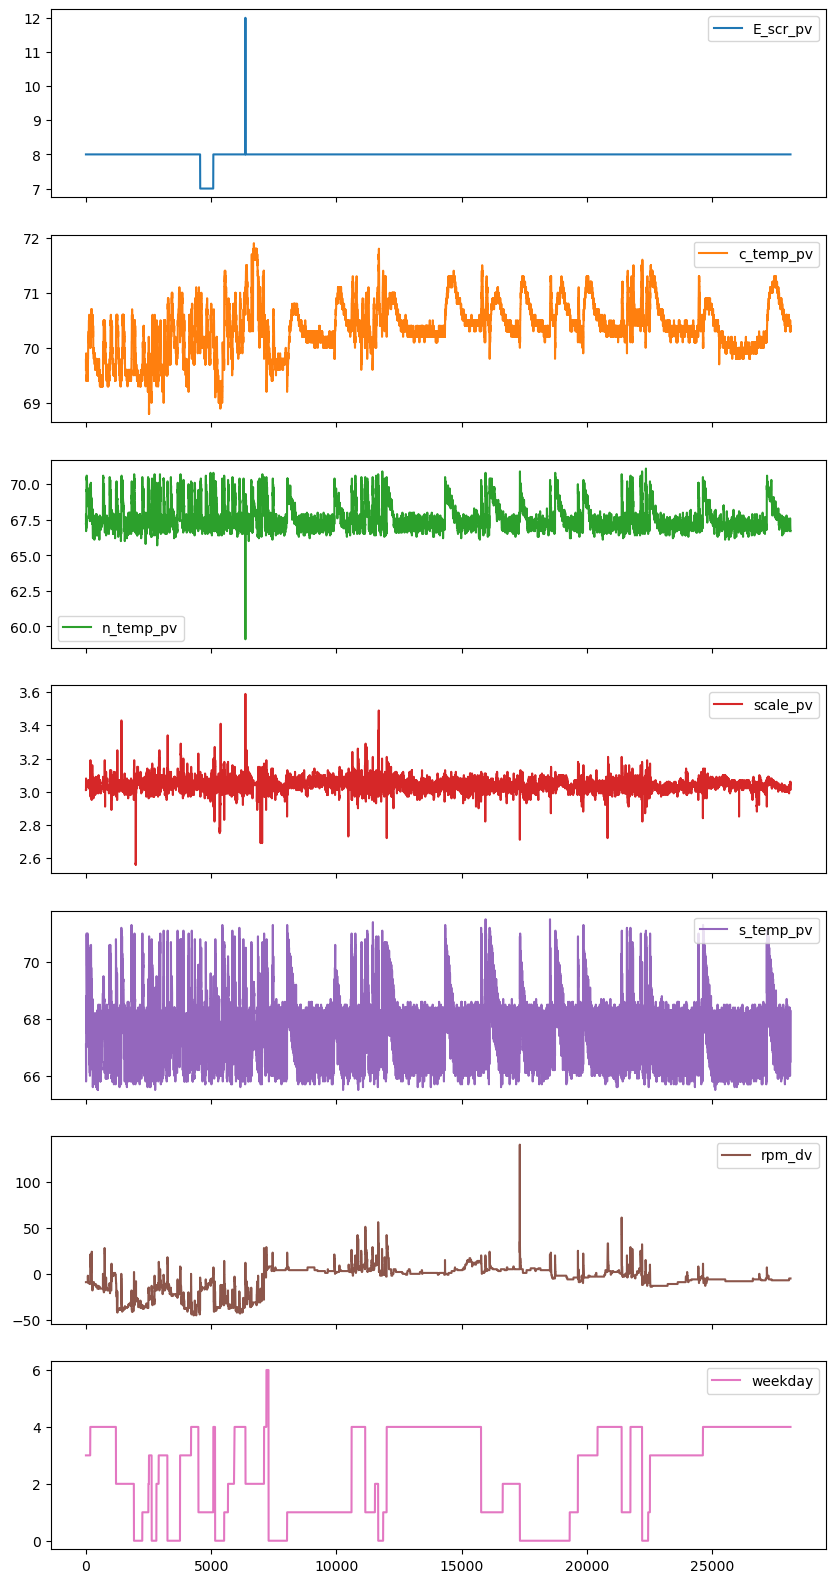

In [17]:
# Visualization
import matplotlib.pyplot as plt

data.plot(subplots=True, figsize=(10, 20))
plt.show()

In [18]:
# E_scr_pv : 9이상의 값 확인
data[data['E_scr_pv'] > 9]

,E_scr_pv,c_temp_pv,n_temp_pv,scale_pv,s_temp_pv,rpm_dv,weekday
6361,12,71.1,59.2,3.59,69.9,5,4
6362,12,71.1,59.1,3.59,69.9,5,4
6363,12,71.1,59.2,3.59,69.9,7,4
6364,12,71.0,59.1,3.59,69.9,10,4
6365,12,71.1,59.1,3.59,69.8,12,4


In [19]:
# n_temp_pv : 63 이하의 값 확인
data[data['n_temp_pv'] < 63]

,E_scr_pv,c_temp_pv,n_temp_pv,scale_pv,s_temp_pv,rpm_dv,weekday
6361,12,71.1,59.2,3.59,69.9,5,4
6362,12,71.1,59.1,3.59,69.9,5,4
6363,12,71.1,59.2,3.59,69.9,7,4
6364,12,71.0,59.1,3.59,69.9,10,4
6365,12,71.1,59.1,3.59,69.8,12,4


In [20]:
# 둘이 같은 행이다?!
# - n_temp_sv 가 0인 항목과 정확히 일치한다!
# - 말썽꾸러기 같으니 삭제하자
data.drop(data[data['n_temp_pv'] < 63].index, inplace=True)
len(data)

28100

In [21]:
# rpm_dv 100 이상의 값 확인
data[data['rpm_dv'] > 100]

,E_scr_pv,c_temp_pv,n_temp_pv,scale_pv,s_temp_pv,rpm_dv,weekday
17316,8,70.2,68.0,3.02,67.0,140,2
17317,8,70.2,68.0,3.02,67.0,140,2
17318,8,70.2,67.9,3.02,66.8,140,2


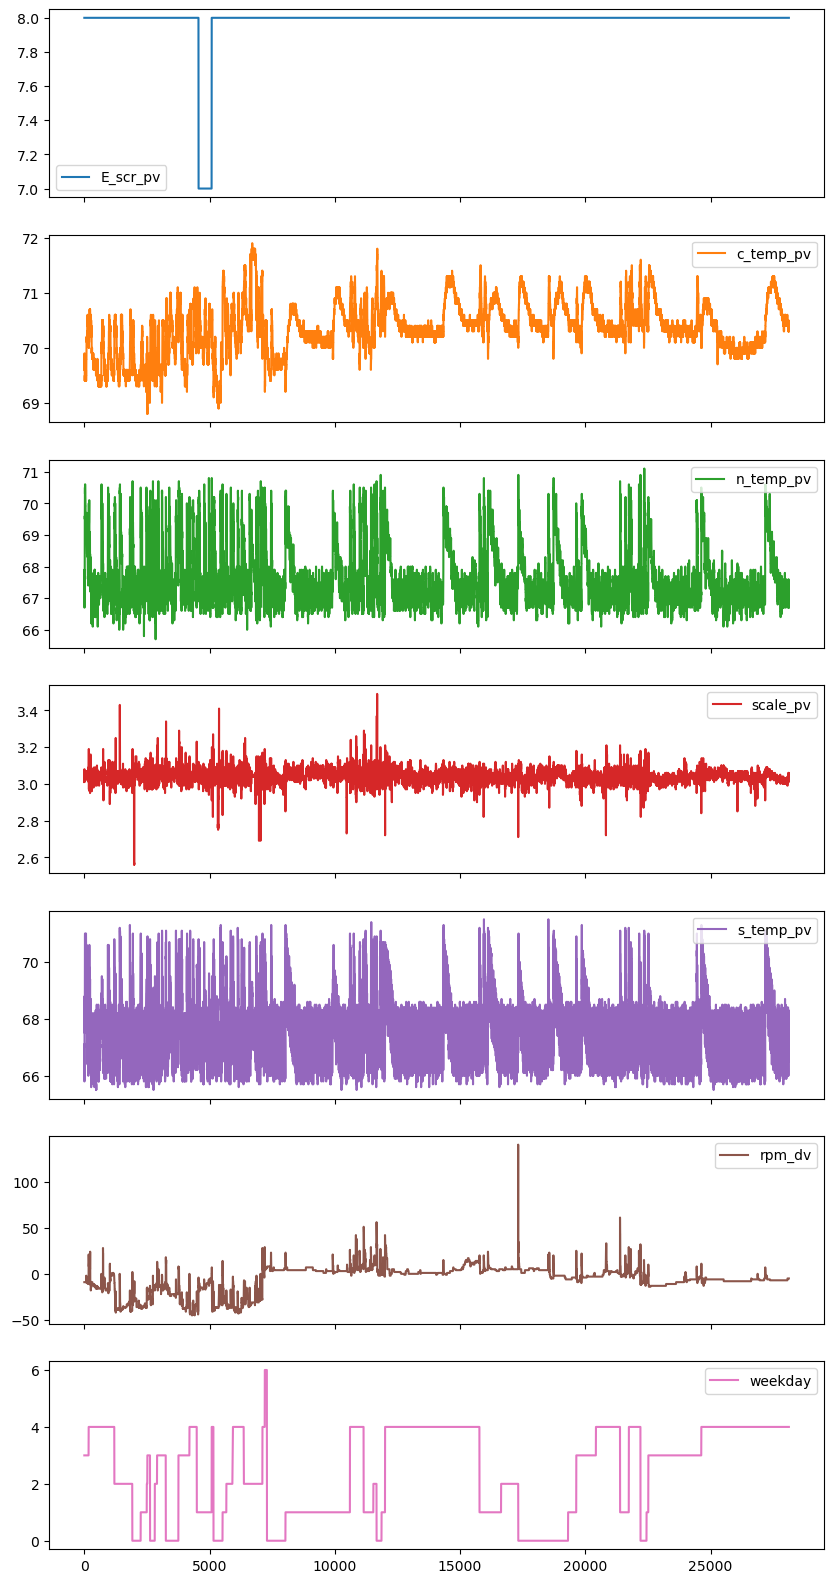

In [22]:
# Visualization 2
data.plot(subplots=True, figsize=(10, 20))
plt.show()

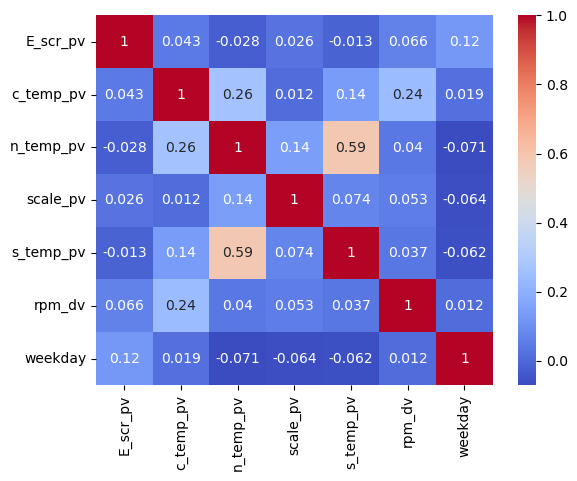

In [23]:
# coeff check : heatmap
import seaborn as sns

sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

In [24]:
# Save the data
data.to_csv('../DATA/scale_final.csv', index=False)